In [3]:
import sklearn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cv2
import os

In [5]:
def load_images(path):
    images_train = []
    labels_train = []

    for sub_folder in os.listdir(path):
        fullpath = os.path.join(path, sub_folder)
        print(fullpath)

        if not os.path.isdir(fullpath):
            continue

        images = os.listdir(fullpath)

        for image_filename in images:
            image_fullpath = os.path.join(fullpath, image_filename)

            if os.path.isdir(image_fullpath):
                continue

            img = cv2.imread(image_fullpath)

            images_train.append(img)
            labels_train.append(sub_folder)

    return np.array(images_train), np.array(labels_train)

In [6]:
DATASET_PATH = 'datasets/Lego/'

In [7]:
images_train, labels_train = load_images(DATASET_PATH)

datasets/Lego/3673 Peg 2M
datasets/Lego/3005 Brick 1x1
datasets/Lego/18651 Cross Axle 2M with Snap friction
datasets/Lego/11214 Bush 3M friction with Cross axle
datasets/Lego/3004 Brick 1x2
datasets/Lego/2357 Brick corner 1x2x2
datasets/Lego/3069 Flat Tile 1x2
datasets/Lego/3040 Roof Tile 1x2x45deg
datasets/Lego/3713 Bush for Cross Axle
datasets/Lego/3003 Brick 2x2
datasets/Lego/3794 Plate 1X2 with 1 Knob
datasets/Lego/32123 half Bush
datasets/Lego/6632 Technic Lever 3M
datasets/Lego/3022 Plate 2x2
datasets/Lego/3023 Plate 1x2
datasets/Lego/3024 Plate 1x1


In [8]:
images_train.shape

(6379, 200, 200, 3)

Label:  3005 Brick 1x1


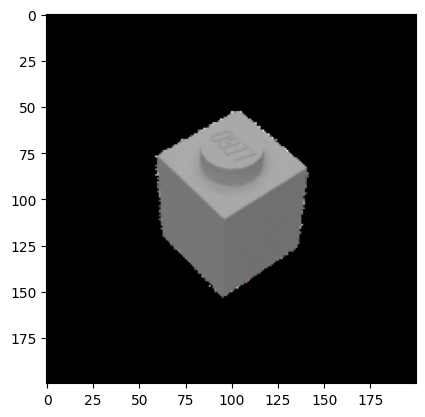

In [10]:
plt.imshow(images_train[467])
print('Label: ', labels_train[467])

In [12]:
X = images_train.reshape(images_train.shape[0], images_train.shape[1] * images_train.shape[2] * images_train.shape[3])

In [13]:
X.shape

(6379, 120000)

In [14]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

Y = encoder.fit_transform(labels_train)

In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, shuffle=True, test_size=0.2)

x_train.shape, y_train.shape


((5103, 120000), (5103,))

In [16]:
from sklearn.neural_network import MLPClassifier

In [17]:
clf_image = MLPClassifier(activation='relu',
                          hidden_layer_sizes=(100, 100, 100),
                          solver='adam',
                          verbose=True,
                          max_iter=100)

In [18]:
clf_image.fit(x_train, y_train)

Iteration 1, loss = 26.22921931
Iteration 2, loss = 12.82646281
Iteration 3, loss = 8.34341028
Iteration 4, loss = 5.49604855
Iteration 5, loss = 4.87929364
Iteration 6, loss = 3.93076520
Iteration 7, loss = 4.43462350
Iteration 8, loss = 3.38237825
Iteration 9, loss = 3.12413071
Iteration 10, loss = 4.04015953
Iteration 11, loss = 2.84853199
Iteration 12, loss = 2.99077785
Iteration 13, loss = 2.70901080
Iteration 14, loss = 2.03150485
Iteration 15, loss = 1.47352532
Iteration 16, loss = 1.33783926
Iteration 17, loss = 1.61204851
Iteration 18, loss = 0.88361995
Iteration 19, loss = 0.89164601
Iteration 20, loss = 1.39645652
Iteration 21, loss = 2.28722834
Iteration 22, loss = 2.34480956
Iteration 23, loss = 1.32443097
Iteration 24, loss = 1.61735740
Iteration 25, loss = 1.56724307
Iteration 26, loss = 1.58785484
Iteration 27, loss = 1.74202161
Iteration 28, loss = 1.92939876
Iteration 29, loss = 1.49320945
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs.

MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=100, verbose=True)

In [19]:
y_pred = clf_image.predict(x_test)

In [20]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.872257053291536